In [55]:
!pip3 install sympy

     |████████████████████████████████| 5.8 MB 3.1 MB/s eta 0:00:01     |███████████████████▊            | 3.6 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 512 kB 13.7 MB/s eta 0:00:01
  Created wheel for mpmath: filename=mpmath-1.1.0-py3-none-any.whl size=532239 sha256=618cc366dd6bc78000f2a28ef665154a9a0d36c086a89e6094282e11a185f710
  Stored in directory: /Users/ryedida/Library/Caches/pip/wheels/29/2c/1c/d2e4580cde2743b0aef389e936ac21a2db92921ddbca53faa1
Successfully built mpmath


In [85]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from raise_utils.metrics import ClassificationMetrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
import sympy
from sympy.parsing.sympy_parser import standard_transformations, parse_expr

In [2]:
!ls ../Dodge/data/issue_close_time/14\ days

camel.csv        deeplearning.csv node.csv
cloudstack.csv   hadoop.csv       ofbiz.csv
cocoon.csv       hive.csv         qpid.csv


In [3]:
file = '../Dodge/data/defect/camel-1.2.csv'

In [4]:
df = pd.read_csv(file)

In [5]:
df.head()

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,camel,1.2,org.apache.camel.component.irc.IrcErrorLogger,9,0,0,5,24,0,1,...,1.0,1,0.000000,0.370370,0,0,22.555556,1,0.8889,0
1,camel,1.2,org.apache.camel.ProducerTemplate,27,1,0,6,27,351,1,...,0.0,0,0.000000,0.412037,0,0,0.000000,1,1.0000,3
2,camel,1.2,org.apache.camel.impl.JndiRegistry,9,1,0,3,18,30,1,...,1.0,0,0.000000,0.355556,0,0,8.000000,1,0.7778,0
3,camel,1.2,org.apache.camel.component.cxf.CxfSoapConsumer,7,1,0,27,50,7,3,...,1.0,3,0.000000,0.416667,0,0,26.428571,1,0.7143,0
4,camel,1.2,org.apache.camel.processor.TryProcessor,8,2,0,10,28,0,1,...,1.0,3,0.684211,0.371429,1,1,26.500000,2,1.0000,9


In [6]:
df.drop('name,version,name.1'.split(','), axis=1, inplace=True)

In [7]:
def get_model(C=1., gamma=1.):
    return SVC(kernel='rbf', C=C, gamma=gamma)

In [8]:
X = df.drop('bug', axis=1)
y = df['bug']
y[y != 0] = 1

smote = SMOTE()
smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-8-94679c7e175f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y != 0] = 1


In [192]:
# Throw 10 things at the wall.
n_samples = 100
recalls = []
pfs = []
cs = []
gammas = []
d2h = []
for i in range(n_samples):
    c = np.random.uniform(0.01, 10.)
    gamma = np.random.uniform(0.01, 0.1)
    
    cs.append(c)
    gammas.append(gamma)
    
    model = get_model(C=c, gamma=gamma)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    metr = ClassificationMetrics(y_test, preds)
    metr.add_metrics(['pd', 'pf'])
    rec, pf = metr.get_metrics()
    print(rec, pf)
    recalls.append(rec)
    pfs.append(pf)
    d2h.append(np.sqrt((1.-rec)**2+pf**2))

0.24193548387096775 0.13333333333333333
0.25806451612903225 0.13333333333333333
0.12903225806451613 0.07777777777777778
0.0 0.0
0.0 0.0
0.11290322580645161 0.07777777777777778
0.27419354838709675 0.13333333333333333
0.14516129032258066 0.08888888888888889
0.11290322580645161 0.08888888888888889
0.11290322580645161 0.08888888888888889
0.27419354838709675 0.13333333333333333
0.16129032258064516 0.08888888888888889
0.08064516129032258 0.05555555555555555
0.12903225806451613 0.08888888888888889
0.24193548387096775 0.13333333333333333
0.14516129032258066 0.07777777777777778
0.08064516129032258 0.05555555555555555
0.2903225806451613 0.13333333333333333
0.27419354838709675 0.13333333333333333
0.11290322580645161 0.07777777777777778
0.14516129032258066 0.08888888888888889
0.14516129032258066 0.08888888888888889
0.04838709677419355 0.06666666666666667
0.16129032258064516 0.1
0.2903225806451613 0.13333333333333333
0.14516129032258066 0.08888888888888889
0.08064516129032258 0.07777777777777778
0.

Text(0, 0.5, 'pd')

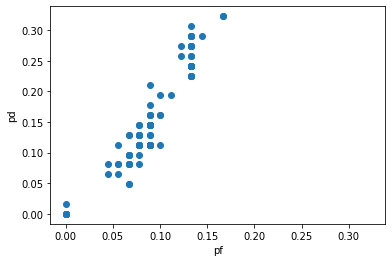

In [193]:
plt.scatter(pfs, recalls)
plt.xlim(plt.ylim())
plt.xlabel('pf')
plt.ylabel('pd')

In [194]:
H = list(zip(cs, gammas))

In [195]:
M = d2h

In [196]:
M

[0.7697009733602534,
 0.7538209601786254,
 0.8744336396824204,
 1.0,
 1.0,
 0.890499898652801,
 0.7379517484095363,
 0.8594477611413369,
 0.8915390744956166,
 0.8915390744956166,
 0.7379517484095363,
 0.8434068754550081,
 0.9210318882709672,
 0.8754918857762742,
 0.7697009733602534,
 0.8583697351835075,
 0.9210318882709672,
 0.7220940501900853,
 0.7379517484095363,
 0.890499898652801,
 0.8594477611413369,
 0.8594477611413369,
 0.9539452615482151,
 0.8446501778824642,
 0.7220940501900853,
 0.8594477611413369,
 0.9226389879985271,
 0.7220940501900853,
 1.0,
 0.8915390744956166,
 0.9365390442916761,
 0.8273694171057242,
 0.7697009733602534,
 0.7697009733602534,
 0.9217688234602759,
 0.8915390744956166,
 0.8594477611413369,
 0.7697009733602534,
 0.8583697351835075,
 0.8744336396824204,
 0.8744336396824204,
 0.7855911329323809,
 0.9204285024383329,
 0.905682782150909,
 0.8735154560376365,
 0.7379517484095363,
 0.7953056117276733,
 0.890499898652801,
 0.8915390744956166,
 0.7855911329323809,

In [197]:
poly = PolynomialFeatures(degree=3)

In [198]:
H_ = poly.fit_transform(H)

In [199]:
H_.shape

(100, 10)

In [200]:
H_train, H_test, M_train, M_test = train_test_split(H_, M)

In [201]:
clf = LinearRegression()
clf.fit(H_train, M_train)

LinearRegression()

In [202]:
preds = clf.predict(H_test)

In [203]:
from sklearn.metrics import r2_score

In [204]:
r2_score(M_test, preds)

0.9242431664478473

In [205]:
# cs and gammas are our hyper-parameters (i.e., what we need as outputs)
# we have a model from H --> M; we need the reverse
M = [.2]

In [163]:
poly.powers_

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2],
       [3, 0],
       [2, 1],
       [1, 2],
       [0, 3]])

In [164]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3']

In [165]:
x0 = sympy.var('x0')
x1 = sympy.var('x1')

local_dict = { 'x0': x0, 'x1': x1 }

In [167]:
clf.intercept_, clf.coef_

(0.07670178170994431,
 array([ 0.00000000e+00,  7.77213691e-04, -2.56786631e+00, -1.43262628e-03,
         5.57042656e-01,  4.35359635e+01,  1.91868754e-04, -4.34007807e-02,
         3.74106266e-01, -2.49346006e+02]))

In [223]:
polynomial = ''.join([f'{"+" if c >= 0 else ""}{round(c, 2)}*{v}' for c, v in zip(clf.coef_, poly.get_feature_names())])

In [224]:
polynomial = polynomial.replace('^', '**').replace(' ', '*') + '-0.4'

In [225]:
polynomial

'+0.0*1-0.02*x0+0.31*x1+0.01*x0**2-0.82*x0*x1-0.28*x1**2-0.0*x0**3+0.07*x0**2*x1-0.52*x0*x1**2-4.44*x1**3-0.4'

In [226]:
func = parse_expr(polynomial, local_dict=local_dict)

In [227]:
func

0.07*x0**2*x1 + 0.01*x0**2 - 0.52*x0*x1**2 - 0.82*x0*x1 - 0.02*x0 - 4.44*x1**3 - 0.28*x1**2 + 0.31*x1 - 0.4

In [228]:
solutions = sympy.solve(func, [x0, x1])

In [229]:
solutions

[((26.0*x1**2 + 41.0*x1 - 61.5142259969188*sqrt(x1**4 + 0.732558139534884*x1**3 + 0.408033826638478*x1**2 + 0.0874735729386892*x1 + 0.0108350951374207) + 1.0)/(7.0*x1 + 1.0),
  x1),
 ((26.0*x1**2 + 41.0*x1 + 61.5142259969188*sqrt(x1**4 + 0.732558139534884*x1**3 + 0.408033826638478*x1**2 + 0.0874735729386892*x1 + 0.0108350951374207) + 1.0)/(7.0*x1 + 1.0),
  x1)]

In [230]:
solutions[-1][0].subs({ 'x1': .4})

12.6098713851040

In [231]:
# gamma = .4, c = 12.61

In [232]:
model = get_model(C=12.61, gamma=.4)

In [233]:
model.fit(X_train, y_train)
preds = model.predict(X_test)
    
metr = ClassificationMetrics(y_test, preds)
metr.add_metrics(['pd', 'pf', 'd2h'])
rec, pf, d = metr.get_metrics()
print(rec, pf, d)

0.3709677419354839 0.18888888888888888 0.24269285265327073


In [234]:
np.sqrt((1.-rec)**2+pf**2)

0.6567804762867293

In [236]:
sum(d <= np.array(d2h)) / len(d2h)

1.0

In [237]:
d

0.24269285265327073

In [238]:
# IT WORKS???